# Classify Cluster Stars from Field Stars with SVM

## Select and Preview Data

In [49]:
import numpy as np

cluster_id = 3  # Pick a cluster, make sure the data file exists

data = np.load('data/{}.npy'.format(cluster_id), allow_pickle=True)
print("#stars: {}".format(data.shape[0]))

#stars: 4551


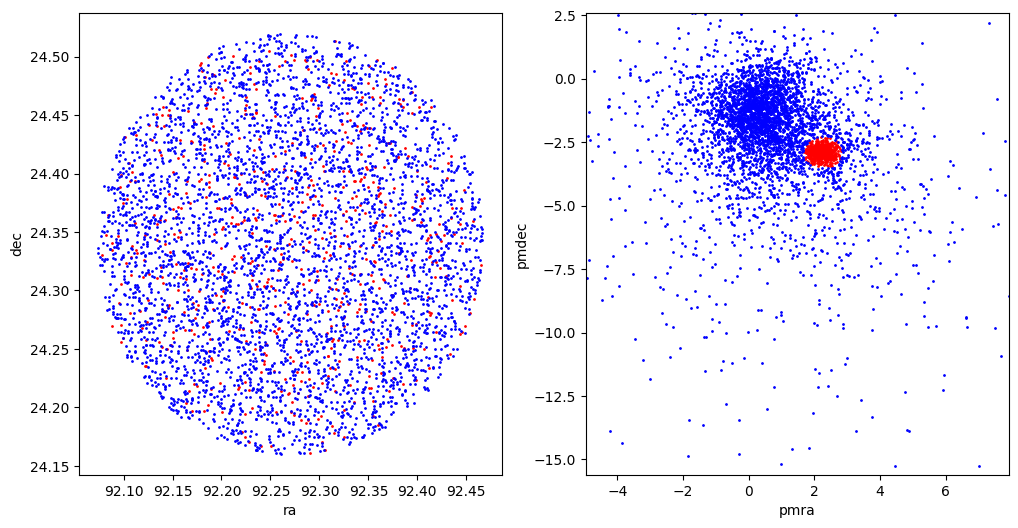

In [50]:
from astromancerpy.plot import plot_cluster

plot_cluster(data)

## Get Data Ready to be Trained on

We need to split features and labels, and then split the whole dataset into training, testing, and validation sets.

In [51]:
from sklearn import preprocessing

features = data[:, 2:4]  # features are np array of 4 tuples: (ra, dec, pmra, pmdec)
labels = data[:, -1]  # labels are np array of numbers: 0 for field stars, 1 for cluster stars

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=69)
print("Training set size: {}".format(X_train.shape[0]))
print("Testing set size: {}".format(X_test.shape[0]))

scaler = preprocessing.StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)

Training set size: 2730
Testing set size: 1821


## Train the SVM Model

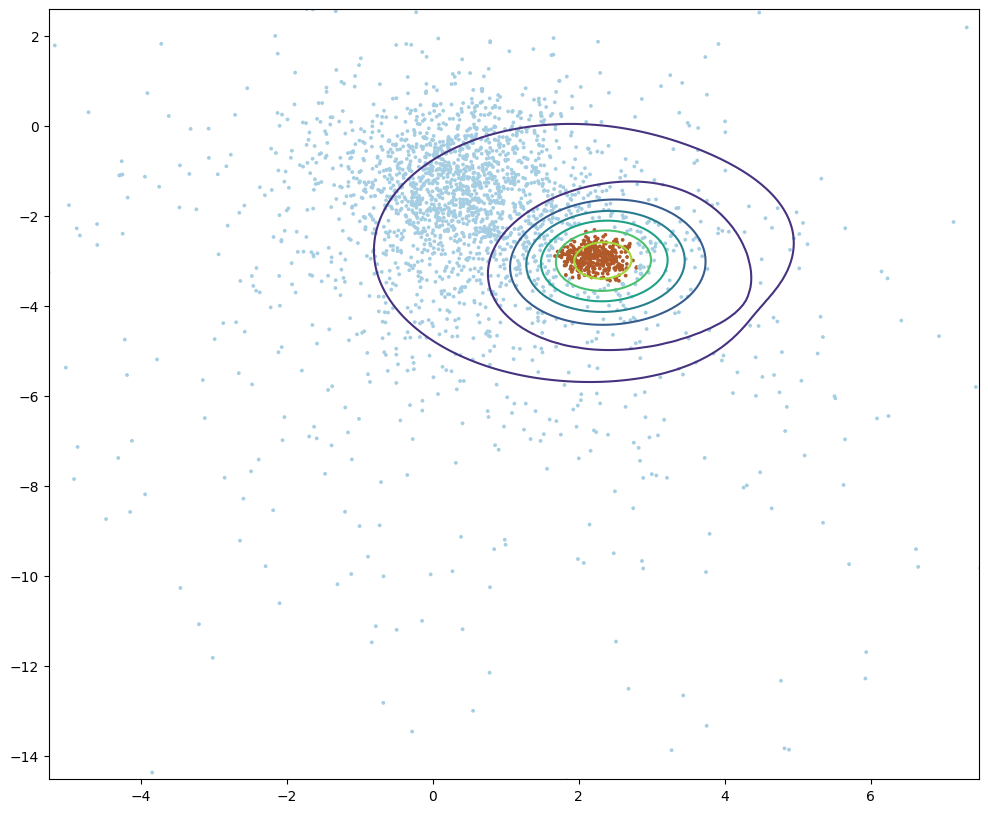

Accuracy: 96.60%


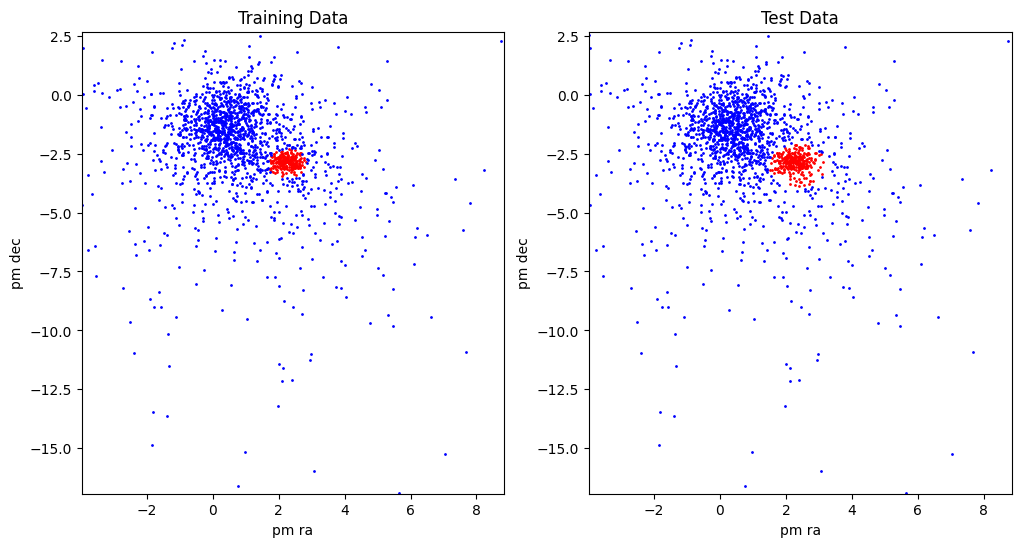

In [52]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

model = svm.NuSVC(kernel='rbf', cache_size=2048, nu=0.1, gamma="auto")

model.fit(X_train, y_train)

# Plot data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=3, cmap=plt.cm.Paired)

# Scale plot
rf = 1  # rejection factor for outliers
pmra_min = np.percentile(X_train[:, 0], rf)
pmra_max = np.percentile(X_train[:, 0], 100 - rf)
pmdec_min = np.percentile(X_train[:, 1], rf)
pmdec_max = np.percentile(X_train[:, 1], 100 - rf)

ax = plt.gca()
ax.figure.set_size_inches(12, 10)
ax.set(xlim=(pmra_min, pmra_max), ylim=(pmdec_min, pmdec_max))

# Plot decision boundary
DecisionBoundaryDisplay.from_estimator(model, X_train, plot_method="contour", ax=ax, grid_resolution=1000)
plt.show()

# accuracy
from sklearn.metrics import accuracy_score

# X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

from astromancerpy.plot import plot_cluster_w_test

plot_cluster_w_test(X_test, y_test, X_test, y_pred)

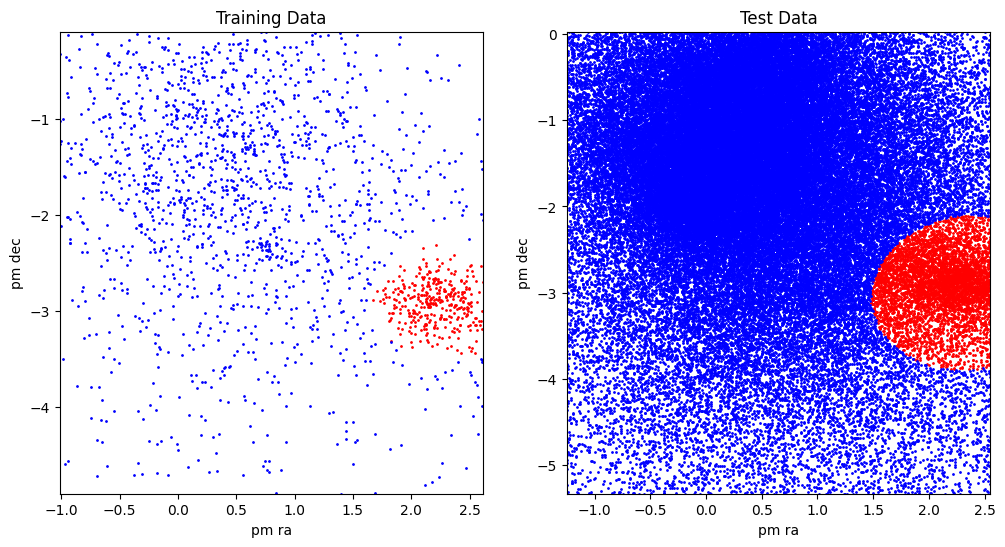

In [53]:
raw_data = np.load('data/{}-raw.npy'.format(cluster_id), allow_pickle=True)
features_raw = raw_data[:, 2:4]
raw_pred = model.predict(features_raw)
plot_cluster_w_test(X_train, y_train, features_raw, raw_pred, 10)